# 데이터 분석 보고서

이 Jupyter Notebook 파일은 GitHub에서도 잘 보이도록 최적화되었습니다.
다음 섹션에서는 데이터 로딩 및 분석 과정을 설명합니다.

In [1]:
import pandas as pd

# 불러온 CSV 파일을 DataFrame으로 변환
data = pd.read_csv('/content/202212-divvy-tripdata.csv')


# 데이터 확인
print(data.head())
# 방법 1: shape 속성 사용
row_count = data.shape[0]

# 방법 2: len() 함수 사용
row_count = len(data)

# 행 갯수 출력
print("총 행 갯수:", row_count)


            ride_id  rideable_type           started_at             ended_at  \
0  65DBD2F447EC51C2  electric_bike  2022-12-05 10:47:18  2022-12-05 10:56:34   
1  0C201AA7EA0EA1AD   classic_bike  2022-12-18 06:42:33  2022-12-18 07:08:44   
2  E0B148CCB358A49D  electric_bike  2022-12-13 08:47:45  2022-12-13 08:59:51   
3  54C5775D2B7C9188   classic_bike  2022-12-13 18:50:47  2022-12-13 19:19:48   
4  A4891F78776D35DF   classic_bike  2022-12-14 16:13:39  2022-12-14 16:27:50   

           start_station_name start_station_id           end_station_name  \
0  Clifton Ave & Armitage Ave     TA1307000163  Sedgwick St & Webster Ave   
1      Broadway & Belmont Ave            13277  Sedgwick St & Webster Ave   
2       Sangamon St & Lake St     TA1306000015     St. Clair St & Erie St   
3       Shields Ave & 31st St     KA1503000038     Damen Ave & Madison St   
4   Ashland Ave & Chicago Ave            13247  Damen Ave & Charleston St   

  end_station_id  start_lat  start_lng    end_lat    end

In [2]:
print(data.head())
print(data.info())

            ride_id  rideable_type           started_at             ended_at  \
0  65DBD2F447EC51C2  electric_bike  2022-12-05 10:47:18  2022-12-05 10:56:34   
1  0C201AA7EA0EA1AD   classic_bike  2022-12-18 06:42:33  2022-12-18 07:08:44   
2  E0B148CCB358A49D  electric_bike  2022-12-13 08:47:45  2022-12-13 08:59:51   
3  54C5775D2B7C9188   classic_bike  2022-12-13 18:50:47  2022-12-13 19:19:48   
4  A4891F78776D35DF   classic_bike  2022-12-14 16:13:39  2022-12-14 16:27:50   

           start_station_name start_station_id           end_station_name  \
0  Clifton Ave & Armitage Ave     TA1307000163  Sedgwick St & Webster Ave   
1      Broadway & Belmont Ave            13277  Sedgwick St & Webster Ave   
2       Sangamon St & Lake St     TA1306000015     St. Clair St & Erie St   
3       Shields Ave & 31st St     KA1503000038     Damen Ave & Madison St   
4   Ashland Ave & Chicago Ave            13247  Damen Ave & Charleston St   

  end_station_id  start_lat  start_lng    end_lat    end

In [3]:
# 중복 데이터 확인
print(data.duplicated().sum())

# 'started_at' 또는 'ended_at' 열을 확인하여 이를 수행할 수 있습니다.
print(data['started_at'].max())
print(data['ended_at'].max())

0
2022-12-31 23:59:26
2023-01-02 04:56:45


In [4]:
# 누락된 값 확인
print(data.isnull().sum())

ride_id                   0
rideable_type             0
started_at                0
ended_at                  0
start_station_name    29283
start_station_id      29283
end_station_name      31158
end_station_id        31158
start_lat                 0
start_lng                 0
end_lat                 128
end_lng                 128
member_casual             0
dtype: int64


In [5]:
# 시작 및 종료 역의 위도와 경도를 기반으로 고유 역 정보 추출
unique_start_stations = data.dropna(subset=['start_station_name', 'start_station_id']).drop_duplicates(['start_lat', 'start_lng'])
unique_end_stations = data.dropna(subset=['end_station_name', 'end_station_id']).drop_duplicates(['end_lat', 'end_lng'])

# 누락된 시작 역 정보 채우기
for index, row in data.iterrows():
    if pd.isnull(row['start_station_name']) or pd.isnull(row['start_station_id']):
        match = unique_start_stations[(unique_start_stations['start_lat'] == row['start_lat']) & (unique_start_stations['start_lng'] == row['start_lng'])]
        if not match.empty:
            data.at[index, 'start_station_name'] = match.iloc[0]['start_station_name']
            data.at[index, 'start_station_id'] = match.iloc[0]['start_station_id']

# 누락된 종료 역 정보 채우기
for index, row in data.iterrows():
    if pd.isnull(row['end_station_name']) or pd.isnull(row['end_station_id']):
        match = unique_end_stations[(unique_end_stations['end_lat'] == row['end_lat']) & (unique_end_stations['end_lng'] == row['end_lng'])]
        if not match.empty:
            data.at[index, 'end_station_name'] = match.iloc[0]['end_station_name']
            data.at[index, 'end_station_id'] = match.iloc[0]['end_station_id']


In [6]:
# 누락된 값 확인
print(data.isnull().sum())



ride_id                   0
rideable_type             0
started_at                0
ended_at                  0
start_station_name    18896
start_station_id      18896
end_station_name      20230
end_station_id        20230
start_lat                 0
start_lng                 0
end_lat                 128
end_lng                 128
member_casual             0
dtype: int64


In [8]:
#데이터 변환
data['started_at'] = pd.to_datetime(data['started_at'])
data['ended_at'] = pd.to_datetime(data['ended_at'])

In [9]:
#이동거리 구하기
data['trip_duration']= data['ended_at'] - data['started_at']


In [20]:
# 요금제 설정
member_rate_per_week = 25  # 회원 사용자의 주간 요금
casual_rate_per_minute = 0.45  # 비회원 사용자의 분당 요금

# 'trip_duration'을 초 단위로 변환
data['trip_duration_seconds'] = data['trip_duration'].dt.total_seconds()

# 회원 사용자 수익 계산
member_revenue = data[data['member_casual'] == 'member'].shape[0] * member_rate_per_week

# 비회원 사용자 수익 계산
casual_revenue = (data[data['member_casual'] == 'casual']['trip_duration_seconds'].sum() / 60) * casual_rate_per_minute

# 결과 출력
print(f"회원 사용자 수익: ${member_revenue:,.2f}")
print(f"비회원 사용자 수익: ${casual_revenue:,.2f}")


회원 사용자 수익: $3,422,800.00
비회원 사용자 수익: $450,300.46


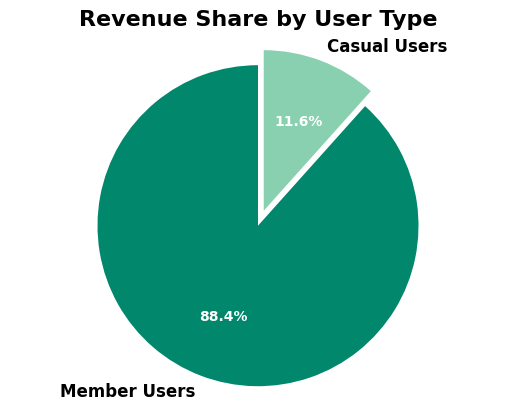

In [21]:
import matplotlib.pyplot as plt

# 파이 차트 만들기
revenues = [member_revenue, casual_revenue]
labels = ['Member Users', 'Casual Users']
explode = (0.1, 0)  # Only pop out the Member Users segment
colors = ['#00876c', '#89d0b0']  # Sophisticated green color palette


# 레이블 만들기
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(revenues, explode=explode, labels=labels, autopct='%1.1f%%',
                                   startangle=90, colors=colors, textprops=dict(color="w"))

# 글꼴 크기와 색상 설정
plt.setp(texts, size=12, weight="bold", color="black")
plt.setp(autotexts, size=10, weight="bold")

# 파이차트 원형으로
ax.axis('equal')

# 글꼴 스타일 타이틀 설정
plt.title('Revenue Share by User Type', fontdict={'fontsize': 16, 'fontweight': 'bold'})

# 파이 차트 보이기
plt.show()

In [22]:
member_usage_frequency = data[data['member_casual'] == 'member'].shape[0]
casual_usage_frequency = data[data['member_casual'] == 'casual'].shape[0]
# 이용 빈도 출력
print("회원의 이용 빈도:", member_usage_frequency)
print("비회원의 이용 빈도:", casual_usage_frequency)

print("회원 단가:" ,member_revenue/member_usage_frequency)
print("비회원 단가:",casual_revenue/casual_usage_frequency)

회원의 이용 빈도: 136912
비회원의 이용 빈도: 44894
회원 단가: 25.0
비회원 단가: 10.030303938165456


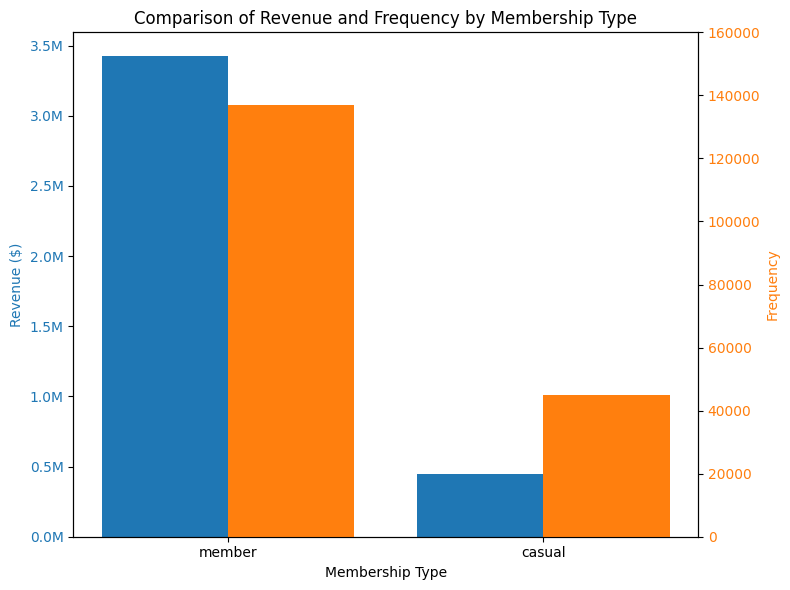

In [23]:
import matplotlib.pyplot as plt

# 'member'와 'casual'에 대한 수익(revenues)과 이용 빈도(frequencies) 계산
# 여기서는 임의의 수익과 이용 빈도 값을 사용합니다. 실제 데이터에 따라 이 값을 조정해야 할 수 있습니다.
revenues = [member_revenue,
           casual_revenue]
frequencies = [data[data['member_casual'] == 'member'].shape[0],
               data[data['member_casual'] == 'casual'].shape[0]]

categories = ['member', 'casual']
positions = range(len(categories))
width = 0.4  # 막대 너비

fig, ax1 = plt.subplots(figsize=(8, 6))

# Revenue (수익)을 위한 막대 차트
color = 'tab:blue'
ax1.set_xlabel('Membership Type')
ax1.set_ylabel('Revenue ($)', color=color)
ax1.bar([p - width/2 for p in positions], revenues, width=width, color=color)
ax1.tick_params(axis='y', labelcolor=color)

# 왼쪽 y축 눈금 레이블에 'M' 추가
def millions_formatter(x, pos):
    return f'{x / 1_000_000}M'
ax1.yaxis.set_major_formatter(plt.FuncFormatter(millions_formatter))

# Frequency (이용 빈도)를 위한 막대 차트, y축을 오른쪽에 설정하고 눈금 조정
ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('Frequency', color=color)
ax2.bar([p + width/2 for p in positions], frequencies, width=width, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(0, 160000)  # y축 범위를 0에서 160,000으로 설정

# x축 레이블 설정
ax1.set_xticks(positions)
ax1.set_xticklabels(categories)

plt.title('Comparison of Revenue and Frequency by Membership Type')
fig.tight_layout()

# 차트를 표시
plt.show()

In [24]:

# 'rideable_type' 컬럼을 기반으로 바이크 종류별 비율 계산
bike_type_counts = data['rideable_type'].value_counts(normalize=True) * 100

# 결과 출력
bike_type_counts


electric_bike    58.595976
classic_bike     40.345203
docked_bike       1.058821
Name: rideable_type, dtype: float64

In [25]:
# 각 스테이션별로 electric_bike와 classic_bike의 사용 횟수 계산
station_bike_usage = data.groupby(['start_station_id', 'rideable_type']).size().unstack(fill_value=0)

# electric_bike와 classic_bike만 선택
station_bike_usage = station_bike_usage[['electric_bike', 'classic_bike']]

# 각 스테이션의 총 사용 횟수를 기준으로 상위 20개 스테이션 추출
top_20_stations = station_bike_usage.sum(axis=1).nlargest(20).index

# 상위 20개 스테이션에서의 electric_bike와 classic_bike 사용 횟수
top_20_station_usage = station_bike_usage.loc[top_20_stations]

# 결과 출력
print(top_20_station_usage)


rideable_type     electric_bike  classic_bike
start_station_id                             
KA1503000043                699           715
WL-012                      778           547
TA1307000039                466           756
21544                       543           623
TA1305000032                626           435
13011                       527           511
TA1308000050                562           471
TA1306000012                471           551
KA1504000135                514           506
TA1306000009                538           462
638                         518           446
TA1307000117                473           470
13016                       441           472
KA1503000071                254           641
13430                       493           400
13045                       411           478
TA1306000003                463           406
TA1307000151                441           419
13137                       389           469
KA1503000014                208   

In [26]:
data.dropna(inplace=True)

row_count = data.shape[0]

# 방법 2: len() 함수 사용
row_count = len(data)

# 행 갯수 출력
print("총 행 갯수:", row_count)

총 행 갯수: 149665


In [27]:
trip_data = data[['started_at', 'ended_at', 'trip_duration']]

In [28]:
trip_data['trip_duration'].min()


Timedelta('0 days 00:00:00')

In [29]:
# 'trip_duration'이 음수인 행을 필터링
negative_duration_data = data[data['trip_duration'] < pd.Timedelta(0)]

# 결과 확인
print(negative_duration_data)


Empty DataFrame
Columns: [ride_id, rideable_type, started_at, ended_at, start_station_name, start_station_id, end_station_name, end_station_id, start_lat, start_lng, end_lat, end_lng, member_casual, trip_duration, route, day_of_week, trip_duration_seconds]
Index: []


In [30]:
number_of_rows =len(negative_duration_data)
number_of_rows

0

In [31]:
data['trip_duration'].describe()

count                       149665
mean     0 days 00:11:12.016817559
std      0 days 00:24:16.775265530
min                0 days 00:00:00
25%                0 days 00:04:37
50%                0 days 00:07:35
75%                0 days 00:12:40
max                1 days 00:59:52
Name: trip_duration, dtype: object

In [32]:
ratio_caual_member=casual_usage_frequency/(member_usage_frequency + casual_usage_frequency)
ratio_caual_member

0.24693354454748467

In [33]:
data.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,trip_duration,route,day_of_week,trip_duration_seconds
0,65DBD2F447EC51C2,electric_bike,2022-12-05 10:47:18,2022-12-05 10:56:34,Clifton Ave & Armitage Ave,TA1307000163,Sedgwick St & Webster Ave,13191,41.918244,-87.657115,41.922167,-87.638888,member,0 days 00:09:16,Clifton Ave & Armitage Ave to Sedgwick St & We...,Monday,556.0
1,0C201AA7EA0EA1AD,classic_bike,2022-12-18 06:42:33,2022-12-18 07:08:44,Broadway & Belmont Ave,13277,Sedgwick St & Webster Ave,13191,41.940106,-87.645451,41.922167,-87.638888,casual,0 days 00:26:11,Broadway & Belmont Ave to Sedgwick St & Webste...,Sunday,1571.0
2,E0B148CCB358A49D,electric_bike,2022-12-13 08:47:45,2022-12-13 08:59:51,Sangamon St & Lake St,TA1306000015,St. Clair St & Erie St,13016,41.885919,-87.651133,41.894345,-87.622798,member,0 days 00:12:06,Sangamon St & Lake St to St. Clair St & Erie St,Tuesday,726.0
3,54C5775D2B7C9188,classic_bike,2022-12-13 18:50:47,2022-12-13 19:19:48,Shields Ave & 31st St,KA1503000038,Damen Ave & Madison St,13134,41.838464,-87.635406,41.881370,-87.674930,member,0 days 00:29:01,Shields Ave & 31st St to Damen Ave & Madison St,Tuesday,1741.0
4,A4891F78776D35DF,classic_bike,2022-12-14 16:13:39,2022-12-14 16:27:50,Ashland Ave & Chicago Ave,13247,Damen Ave & Charleston St,13288,41.895954,-87.667728,41.920082,-87.677855,casual,0 days 00:14:11,Ashland Ave & Chicago Ave to Damen Ave & Charl...,Wednesday,851.0


In [34]:

# 이용 시간대(시간)추가
data['hour_of_day'] = data['started_at'].dt.hour

# 멤버와 캐주얼 사용자별 이용 시간대 분포 계산
member_hour_usage = data[data['member_casual'] == 'member']['hour_of_day'].value_counts().sort_index()
casual_hour_usage = data[data['member_casual'] == 'casual']['hour_of_day'].value_counts().sort_index()

# 멤버와 캐주얼 사용자별 주요 이용 스테이션 계산
member_start_stations = data[data['member_casual'] == 'member']['start_station_name'].value_counts()
casual_start_stations = data[data['member_casual'] == 'casual']['start_station_name'].value_counts()

# 결과 출력
print("멤버 이용 시간대 분포:\n", member_hour_usage)
print("\n캐주얼 이용 시간대 분포:\n", casual_hour_usage)
print("\n멤버 주요 시작 스테이션:\n", member_start_stations.head())
print("\n캐주얼 주요 시작 스테이션:\n", casual_start_stations.head(10))


멤버 이용 시간대 분포:
 0      1181
1       786
2       447
3       282
4       383
5      1239
6      3785
7      7240
8      8777
9      5369
10     4692
11     5804
12     6480
13     6304
14     6452
15     8237
16    10145
17    11102
18     8225
19     5788
20     3837
21     2985
22     2304
23     1621
Name: hour_of_day, dtype: int64

캐주얼 이용 시간대 분포:
 0      714
1      534
2      321
3      201
4      172
5      296
6      810
7     1344
8     1808
9     1332
10    1457
11    1983
12    2260
13    2288
14    2402
15    3131
16    3181
17    3052
18    2471
19    1911
20    1283
21    1133
22    1162
23     954
Name: hour_of_day, dtype: int64

멤버 주요 시작 스테이션:
 Kingsbury St & Kinzie St        1107
Clinton St & Washington Blvd    1092
Clark St & Elm St                932
State St & Chicago Ave           928
Canal St & Adams St              828
Name: start_station_name, dtype: int64

캐주얼 주요 시작 스테이션:
 Shedd Aquarium                       433
Streeter Dr & Grand Ave              406
Millennium 

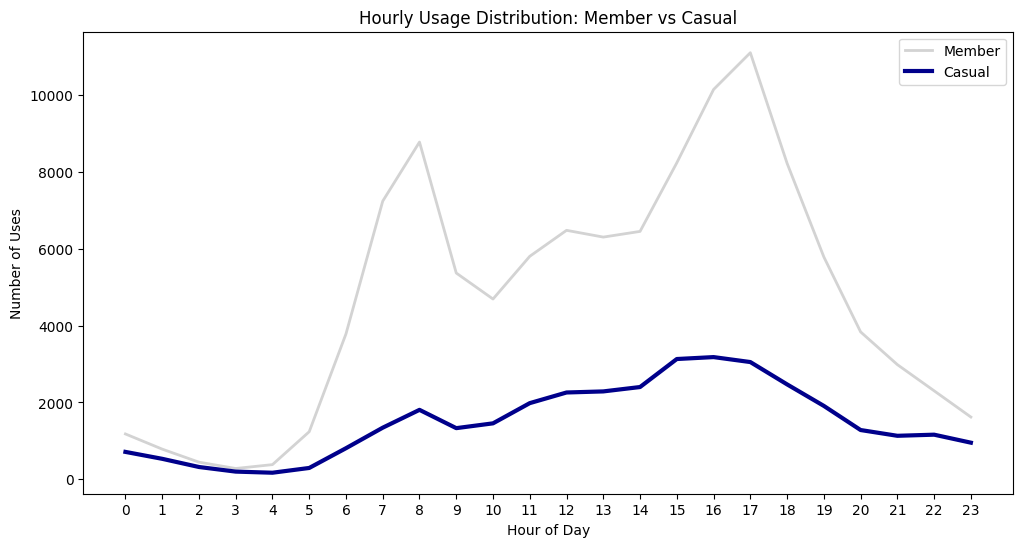

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# 멤버 사용자 - 더 밝은 색과 얇은 라인으로 서브 느낌을 줌
plt.plot(member_hour_usage, label='Member', color='lightgray', linewidth=2)

# 캐주얼 사용자 - 더 어두운 색과 굵은 라인으로 강조
plt.plot(casual_hour_usage, label='Casual', color='darkblue', linewidth=3)

plt.title('Hourly Usage Distribution: Member vs Casual')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Uses')
plt.xticks(range(0, 24))
plt.legend()
plt.show()

In [36]:

# 관심 있는 스테이션 이름 리스트
stations = [ 'Shedd Aquarium',
'Streeter Dr & Grand Ave',
'Millennium Park',
'DuSable Lake Shore Dr & Monroe St',
'Kingsbury St & Kinzie St',
'Clark St & Newport St',
'LaSalle St & Illinois St',
'Clark St & Elm St',
'Wabash Ave & Grand Ave',
'Michigan Ave & 8th St'

]

# 각 스테이션의 위도와 경도 정보를 추출
station_coordinates = {}
for station in stations:
    station_data = data[data['start_station_name'] == station].iloc[0]
    station_coordinates[station] = {
        'start_lat': station_data['start_lat'],
        'start_lng': station_data['start_lng']
    }

# 추출한 정보를 출력
for station, coords in station_coordinates.items():
    print(f"{station}: 위도 {coords['start_lat']}, 경도 {coords['start_lng']}")


Shedd Aquarium: 위도 41.86722595682, 경도 -87.6153553902
Streeter Dr & Grand Ave: 위도 41.892271399, 경도 -87.612205386
Millennium Park: 위도 41.8810317, 경도 -87.62408432
DuSable Lake Shore Dr & Monroe St: 위도 41.880958, 경도 -87.616743
Kingsbury St & Kinzie St: 위도 41.889224052, 경도 -87.638541102
Clark St & Newport St: 위도 41.94444816666667, 경도 -87.65470916666666
LaSalle St & Illinois St: 위도 41.89066016666666, 경도 -87.6314525
Clark St & Elm St: 위도 41.90281866666667, 경도 -87.6316435
Wabash Ave & Grand Ave: 위도 41.891783953, 경도 -87.626822114
Michigan Ave & 8th St: 위도 41.872773, 경도 -87.623981


In [37]:
import math
import pandas as pd
# Haversine 공식을 사용하여 거리 계산하는 함수
def haversine(lat1, lon1, lat2, lon2):
    # 지구 반경 (km 단위)
    R = 6371.0

    # 위도, 경도를 라디안으로 변환
    lat1 = math.radians(lat1)
    lon1 = math.radians(lon1)
    lat2 = math.radians(lat2)
    lon2 = math.radians(lon2)

    # 위도와 경도의 차이
    dlat = lat2 - lat1
    dlon = lon2 - lon1

    # Haversine 공식
    a = math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))

    # 최종 거리
    distance = R * c
    return distance

# 데이터 프레임의 각 행에 대해 거리 계산
data['distance'] = data.apply(lambda row: haversine(row['start_lat'], row['start_lng'], row['end_lat'], row['end_lng']), axis=1)

# 결과 확인
print(data[['start_lat', 'start_lng', 'end_lat', 'end_lng', 'distance']].head())


   start_lat  start_lng    end_lat    end_lng  distance
0  41.918244 -87.657115  41.922167 -87.638888  1.569868
1  41.940106 -87.645451  41.922167 -87.638888  2.067289
2  41.885919 -87.651133  41.894345 -87.622798  2.525678
3  41.838464 -87.635406  41.881370 -87.674930  5.785813
4  41.895954 -87.667728  41.920082 -87.677855  2.810713


In [38]:

# 'distance' 컬럼을 이용하여 멤버와 캐주얼 사용자의 평균 거리 계산
member_avg_distance = data[data['member_casual'] == 'member']['distance'].mean()
casual_avg_distance = data[data['member_casual'] == 'casual']['distance'].mean()

# 결과 출력
print(f"멤버 사용자의 평균 거리: {member_avg_distance} km")
print(f"캐주얼 사용자의 평균 거리: {casual_avg_distance} km")

멤버 사용자의 평균 거리: 1.7848778675208914 km
캐주얼 사용자의 평균 거리: 1.7099901360039518 km


In [39]:
data.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,trip_duration,route,day_of_week,trip_duration_seconds,hour_of_day,distance
0,65DBD2F447EC51C2,electric_bike,2022-12-05 10:47:18,2022-12-05 10:56:34,Clifton Ave & Armitage Ave,TA1307000163,Sedgwick St & Webster Ave,13191,41.918244,-87.657115,41.922167,-87.638888,member,0 days 00:09:16,Clifton Ave & Armitage Ave to Sedgwick St & We...,Monday,556.0,10,1.569868
1,0C201AA7EA0EA1AD,classic_bike,2022-12-18 06:42:33,2022-12-18 07:08:44,Broadway & Belmont Ave,13277,Sedgwick St & Webster Ave,13191,41.940106,-87.645451,41.922167,-87.638888,casual,0 days 00:26:11,Broadway & Belmont Ave to Sedgwick St & Webste...,Sunday,1571.0,6,2.067289
2,E0B148CCB358A49D,electric_bike,2022-12-13 08:47:45,2022-12-13 08:59:51,Sangamon St & Lake St,TA1306000015,St. Clair St & Erie St,13016,41.885919,-87.651133,41.894345,-87.622798,member,0 days 00:12:06,Sangamon St & Lake St to St. Clair St & Erie St,Tuesday,726.0,8,2.525678
3,54C5775D2B7C9188,classic_bike,2022-12-13 18:50:47,2022-12-13 19:19:48,Shields Ave & 31st St,KA1503000038,Damen Ave & Madison St,13134,41.838464,-87.635406,41.881370,-87.674930,member,0 days 00:29:01,Shields Ave & 31st St to Damen Ave & Madison St,Tuesday,1741.0,18,5.785813
4,A4891F78776D35DF,classic_bike,2022-12-14 16:13:39,2022-12-14 16:27:50,Ashland Ave & Chicago Ave,13247,Damen Ave & Charleston St,13288,41.895954,-87.667728,41.920082,-87.677855,casual,0 days 00:14:11,Ashland Ave & Chicago Ave to Damen Ave & Charl...,Wednesday,851.0,16,2.810713


In [40]:

# 'start_station_name'과 'end_station_name'을 결합하여 경로 생성
data['route'] = data['start_station_name'] + " to " + data['end_station_name']

# 멤버와 캐주얼 사용자별로 가장 많이 이용된 경로 계산
member_routes = data[data['member_casual'] == 'member']['route'].value_counts().head(10)
casual_routes = data[data['member_casual'] == 'casual']['route'].value_counts().head(10)

# 결과 출력
print("멤버 사용자의 상위 이용 경로:\n", member_routes)
print("캐주얼 사용자의 상위 이용 경로:\n", casual_routes)




멤버 사용자의 상위 이용 경로:
 University Ave & 57th St to Ellis Ave & 60th St     232
Ellis Ave & 60th St to University Ave & 57th St     221
Ellis Ave & 60th St to Ellis Ave & 55th St          198
Calumet Ave & 33rd St to State St & 33rd St         191
Ellis Ave & 55th St to Ellis Ave & 60th St          184
State St & 33rd St to Calumet Ave & 33rd St         181
Loomis St & Lexington St to Morgan St & Polk St     108
State St & Chicago Ave to State St & Chicago Ave    105
Morgan St & Polk St to Loomis St & Lexington St     102
MLK Jr Dr & 29th St to State St & 33rd St            93
Name: route, dtype: int64
캐주얼 사용자의 상위 이용 경로:
 Streeter Dr & Grand Ave to Streeter Dr & Grand Ave                        69
DuSable Lake Shore Dr & Monroe St to DuSable Lake Shore Dr & Monroe St    64
DuSable Lake Shore Dr & Monroe St to Streeter Dr & Grand Ave              58
Shedd Aquarium to DuSable Lake Shore Dr & Monroe St                       57
Millennium Park to Millennium Park                                 

In [41]:

# 'route' 열 생성
data['route'] = data['start_station_name'] + " to " + data['end_station_name']

# 멤버와 캐주얼 사용자별로 가장 많이 이용된 경로 계산
member_routes = data[data['member_casual'] == 'member']['route'].value_counts().head(10)
casual_routes = data[data['member_casual'] == 'casual']['route'].value_counts().head(10)

# 경로에 대한 좌표 추출 함수
def get_route_coordinates(data, top_routes):
    route_coordinates = {}
    for route in top_routes.index:
        start_station, end_station = route.split(" to ")
        start_coords = data[data['start_station_name'] == start_station][['start_lat', 'start_lng']].iloc[0]
        end_coords = data[data['end_station_name'] == end_station][['end_lat', 'end_lng']].iloc[0]
        route_coordinates[route] = (start_coords.tolist(), end_coords.tolist())
    return route_coordinates

# 멤버 사용자의 상위 이용 경로 좌표
member_route_coords = get_route_coordinates(data, member_routes)

# 캐주얼 사용자의 상위 이용 경로 좌표
casual_route_coords = get_route_coordinates(data, casual_routes)

# 좌표 결과 확인
print("멤버 사용자의 상위 이용 경로 좌표:\n", member_route_coords)
print("캐주얼 사용자의 상위 이용 경로 좌표:\n", casual_route_coords)


멤버 사용자의 상위 이용 경로 좌표:
 {'University Ave & 57th St to Ellis Ave & 60th St': ([41.791478, -87.599861], [41.78509714636, -87.6010727606]), 'Ellis Ave & 60th St to University Ave & 57th St': ([41.78509714636, -87.6010727606], [41.791478, -87.599861]), 'Ellis Ave & 60th St to Ellis Ave & 55th St': ([41.78509714636, -87.6010727606], [41.79430062054, -87.6014497734]), 'Calumet Ave & 33rd St to State St & 33rd St': ([41.834846139, -87.617929697], [41.834734, -87.625813]), 'Ellis Ave & 55th St to Ellis Ave & 60th St': ([41.79430062054, -87.6014497734], [41.78509714636, -87.6010727606]), 'State St & 33rd St to Calumet Ave & 33rd St': ([41.834734, -87.625813], [41.8349, -87.61793]), 'Loomis St & Lexington St to Morgan St & Polk St': ([41.87222873224032, -87.66136385500431], [41.871737, -87.65103]), 'State St & Chicago Ave to State St & Chicago Ave': ([41.8963355, -87.628603], [41.89661720040753, -87.62857854366302]), 'Morgan St & Polk St to Loomis St & Lexington St': ([41.87198333333333, -87.65116

In [42]:
import folium

# 멤버 사용자의 상위 이용 경로 좌표
member_route_coords = {
    'Ellis Ave & 60th St to University Ave & 57th St': ([41.78509416666667, -87.60108833333334], [41.791478, -87.599861]),
    'Ellis Ave & 60th St to Ellis Ave & 55th St': ([41.78509416666667, -87.60108833333334], [41.79430062054, -87.6014497734]),
    'University Ave & 57th St to Ellis Ave & 60th St': ([41.791512, -87.59993216666666], [41.78509714636, -87.6010727606]),
    'Ellis Ave & 55th St to Ellis Ave & 60th St': ([41.79430062054, -87.6014497734], [41.78509714636, -87.6010727606]),
    'State St & 33rd St to Calumet Ave & 33rd St': ([41.834722281, -87.625763297], [41.8349, -87.61793]),
     'Calumet Ave & 33rd St to State St & 33rd St': ([41.834852815, -87.617890954], [41.834734, -87.625813]),
    'Loomis St & Lexington St to Morgan St & Polk St': ([41.87222873224032, -87.66136385500431], [41.871737, -87.65103]),
    'Morgan St & Polk St to Loomis St & Lexington St': ([41.872038484, -87.650987387], [41.87222873224032, -87.66136385500431]),
    'University Ave & 57th St to Kimbark Ave & 53rd St': ([41.791512, -87.59993216666666], [41.799568, -87.594747]),
    'Ellis Ave & 58th St to Ellis Ave & 60th St': ([41.78856366666667, -87.601174], [41.78509714636, -87.6010727606])
}

# 캐주얼 사용자의 상위 이용 경로 좌표
casual_route_coords = {
    'Streeter Dr & Grand Ave to Streeter Dr & Grand Ave': ([41.892278, -87.612043], [41.892278, -87.612043]),
    'Ellis Ave & 60th St to Ellis Ave & 55th St': ([41.78509416666667, -87.60108833333334], [41.79430062054, -87.6014497734]),
    'DuSable Lake Shore Dr & Monroe St to DuSable Lake Shore Dr & Monroe St': ([41.880958, -87.616743], [41.880958, -87.616743]),
    'Ellis Ave & 55th St to Ellis Ave & 60th St': ([41.79430062054, -87.6014497734], [41.78509714636, -87.6010727606]),
    'DuSable Lake Shore Dr & Monroe St to Streeter Dr & Grand Ave': ([41.880958, -87.616743], [41.892278, -87.612043]),
    'Ellis Ave & 60th St to University Ave & 57th St': ([41.78509416666667, -87.60108833333334], [41.791478, -87.599861]),
    'University Ave & 57th St to Ellis Ave & 60th St': ([41.791512, -87.59993216666666], [41.78509714636, -87.6010727606]),
    'University Ave & 57th St to Kimbark Ave & 53rd St': ([41.791512, -87.59993216666666], [41.799568, -87.594747]),
    'Streeter Dr & Grand Ave to Millennium Park': ([41.892278, -87.612043], [41.881032, -87.624084]),
    'Sheffield Ave & Fullerton Ave to Greenview Ave & Fullerton Ave': ([41.92556283333333, -87.6537395], [41.92533, -87.6658])
}

# 지도 생성
m = folium.Map(location=[41.8781, -87.6298], zoom_start=12)

# 멤버 사용자의 경로 표시
for route, coords in member_route_coords.items():
    folium.PolyLine(coords, color="blue").add_to(m)

# 캐주얼 사용자의 경로 표시
for route, coords in casual_route_coords.items():
    folium.PolyLine(coords, color="red").add_to(m)

# 지도 표시
m.save("map.html")


In [43]:
import folium

# 캐주얼 사용자의 상위 이용 경로 좌표
casual_route_coords = {
    'Streeter Dr & Grand Ave to Streeter Dr & Grand Ave': ([41.892278, -87.612043], [41.892278, -87.612043]),
    'Ellis Ave & 60th St to Ellis Ave & 55th St': ([41.78509416666667, -87.60108833333334], [41.79430062054, -87.6014497734]),
    'DuSable Lake Shore Dr & Monroe St to DuSable Lake Shore Dr & Monroe St': ([41.880958, -87.616743], [41.880958, -87.616743]),
    'Ellis Ave & 55th St to Ellis Ave & 60th St': ([41.79430062054, -87.6014497734], [41.78509714636, -87.6010727606]),
    'DuSable Lake Shore Dr & Monroe St to Streeter Dr & Grand Ave': ([41.880958, -87.616743], [41.892278, -87.612043]),
    'Ellis Ave & 60th St to University Ave & 57th St': ([41.78509416666667, -87.60108833333334], [41.791478, -87.599861]),
    'University Ave & 57th St to Ellis Ave & 60th St': ([41.791512, -87.59993216666666], [41.78509714636, -87.6010727606]),
    'University Ave & 57th St to Kimbark Ave & 53rd St': ([41.791512, -87.59993216666666], [41.799568, -87.594747]),
    'Streeter Dr & Grand Ave to Millennium Park': ([41.892278, -87.612043], [41.881032, -87.624084]),
    'Sheffield Ave & Fullerton Ave to Greenview Ave & Fullerton Ave': ([41.92556283333333, -87.6537395], [41.92533, -87.6658])
}

# 이용 빈도
route_usage = {
    'Streeter Dr & Grand Ave to Streeter Dr & Grand Ave': 192,
    'Ellis Ave & 60th St to Ellis Ave & 55th St': 180,
    'DuSable Lake Shore Dr & Monroe St to DuSable Lake Shore Dr & Monroe St': 165,
    'Ellis Ave & 55th St to Ellis Ave & 60th St': 161,
    'DuSable Lake Shore Dr & Monroe St to Streeter Dr & Grand Ave': 155,
    'Ellis Ave & 60th St to University Ave & 57th St': 153,
    'University Ave & 57th St to Ellis Ave & 60th St': 133,
    'University Ave & 57th St to Kimbark Ave & 53rd St': 94,
    'Streeter Dr & Grand Ave to Millennium Park': 86,
    'Sheffield Ave & Fullerton Ave to Greenview Ave & Fullerton Ave': 81
}

# 지도 생성
m = folium.Map(location=[41.8781, -87.6298], zoom_start=12)

# 캐주얼 사용자의 경로 및 마커 표시
for route, coords in casual_route_coords.items():
    # 선의 굵기 설정 (이용 빈도에 따라 조정)
    line_weight = route_usage.get(route, 1) * 0.05  # 이용 빈도에 비례하여 선의 굵기를 조정

    # 경로 표시
    folium.PolyLine(coords, color="red", weight=line_weight,alpha=0.5).add_to(m)

    # 끝점에 마커 추가
    folium.Marker(coords[1], popup=route).add_to(m)

# 지도 저장
m.save("map.html")

In [44]:
# 'start_station_id'와 'end_station_id' 컬럼에서 중복 제거하고 스테이션 개수 계산
unique_stations = pd.concat([data['start_station_id'], data['end_station_id']]).unique()
number_of_stations = len(unique_stations)

# 결과 출력
print(f"중복 없는 스테이션의 총 개수: {number_of_stations}")


중복 없는 스테이션의 총 개수: 994


In [45]:
import folium


# 스테이션별 이용 빈도수 계산
station_usage_start = data['start_station_id'].value_counts()
station_usage_end = data['end_station_id'].value_counts()
station_usage = station_usage_start.add(station_usage_end, fill_value=0)

# 스테이션 위치 데이터 추출
station_locations = data.groupby('start_station_id').first()[['start_lat', 'start_lng']].dropna()

# 지도 생성
m = folium.Map(location=[station_locations['start_lat'].mean(), station_locations['start_lng'].mean()], zoom_start=12)

# 스테이션별 마커 추가
for station_id, row in station_locations.iterrows():
    usage = station_usage.get(station_id, 0)
    # 너무 큰 원을 방지하기 위한 크기 제한 설정
    radius = min(usage, 1000) * 2  # 최대 크기를 1000으로 제한
    folium.Circle(
        location=(row['start_lat'], row['start_lng']),
        radius=radius,
        color='blue',
        fill=True,
        fill_opacity=0.01,
        weight=0.1
    ).add_to(m)

# 지도 저장
m.save("map.html")


In [46]:

# 각 라이드가 시작된 요일 계산 (1 = 일요일, 7 = 토요일)
data['day_of_week'] = data['started_at'].dt.dayofweek + 1

# 전체 라이드의 요일별 빈도수 계산
overall_day_frequency = data['day_of_week'].value_counts().sort_index()

# 멤버와 캐주얼 사용자별 요일별 빈도수 계산
member_day_frequency = data[data['member_casual'] == 'member']['day_of_week'].value_counts().sort_index()
casual_day_frequency = data[data['member_casual'] == 'casual']['day_of_week'].value_counts().sort_index()

# 결과 출력
print("전체 요일별 빈도:  {0}".format(overall_day_frequency)),
print("회원 요일별 빈도:  {0}".format(member_day_frequency)),
print("비회원 요일별 빈도:  {0}".format(casual_day_frequency))


전체 요일별 빈도:  1    19730
2    23361
3    21363
4    29249
5    21991
6    19855
7    14116
Name: day_of_week, dtype: int64
회원 요일별 빈도:  1    15773
2    18609
3    16833
4    22586
5    16213
6    13643
7     9808
Name: day_of_week, dtype: int64
비회원 요일별 빈도:  1    3957
2    4752
3    4530
4    6663
5    5778
6    6212
7    4308
Name: day_of_week, dtype: int64


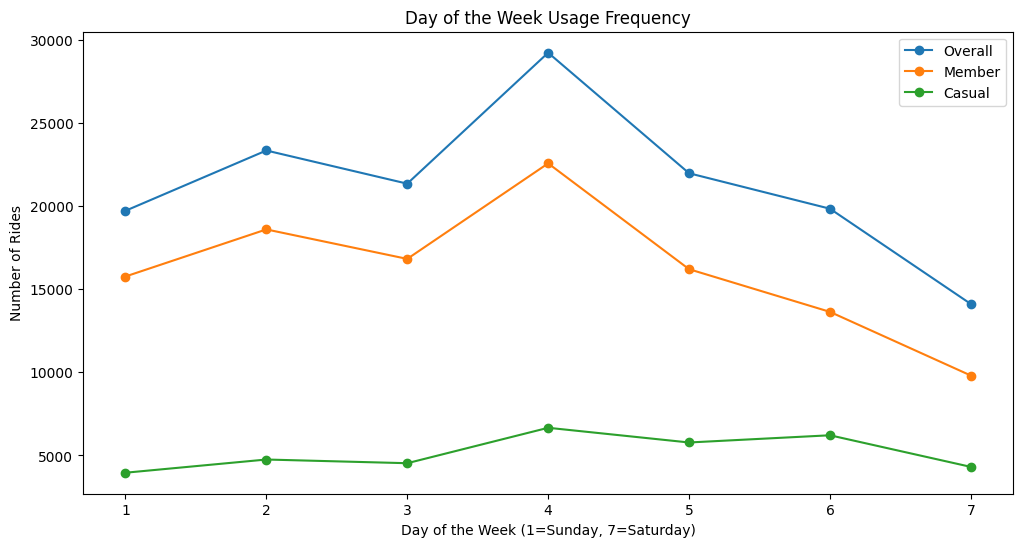

In [47]:
import matplotlib.pyplot as plt

# 전체 라이드의 요일별 빈도수 계산
overall_day_frequency = data['day_of_week'].value_counts().sort_index()

# 멤버와 캐주얼 사용자별 요일별 빈도수 계산
member_day_frequency = data[data['member_casual'] == 'member']['day_of_week'].value_counts().sort_index()
casual_day_frequency = data[data['member_casual'] == 'casual']['day_of_week'].value_counts().sort_index()

# 요일별 분포 그래프 그리기
plt.figure(figsize=(12, 6))
plt.plot(overall_day_frequency.index, overall_day_frequency.values, label='Overall', marker='o')
plt.plot(member_day_frequency.index, member_day_frequency.values, label='Member', marker='o')
plt.plot(casual_day_frequency.index, casual_day_frequency.values, label='Casual', marker='o')

# 그래프 제목 및 레이블 설정
plt.title('Day of the Week Usage Frequency')
plt.xlabel('Day of the Week (1=Sunday, 7=Saturday)')
plt.ylabel('Number of Rides')
plt.xticks(range(1, 8))
plt.legend()

# 그래프 표시
plt.show()



In [48]:

# 요일별 이용량 계산
data['day_of_week'] = data['started_at'].dt.day_name()

# 각 요일별 가장 높은 이용량을 가진 시간대 찾기
best_marketing_times = data.groupby('day_of_week')['started_at'].apply(lambda x: x.dt.hour.mode().iloc[0]).reset_index()

# 결과 출력
print("요일별 가장 적합한 마케팅 시간대:")
for index, row in best_marketing_times.iterrows():
    print(f"{row['day_of_week']}: {row['started_at']} 시")


요일별 가장 적합한 마케팅 시간대:
Friday: 17 시
Monday: 17 시
Saturday: 15 시
Sunday: 15 시
Thursday: 17 시
Tuesday: 17 시
Wednesday: 17 시


In [49]:

# 요일과 시간대별 이용 횟수 계산
usage_by_day_hour = data.groupby(['day_of_week', 'hour_of_day']).size().reset_index(name='이용횟수')

# 상위 10개 조합 선택
top_10_times = usage_by_day_hour.nlargest(10, '이용횟수')

# 결과 출력
print("상위 10개 요일과 시간대별 이용 횟수:")
for index, row in top_10_times.iterrows():
    print(f"{row['day_of_week']} {row['hour_of_day']}시 - 이용횟수: {row['이용횟수']}회")


상위 10개 요일과 시간대별 이용 횟수:
Tuesday 17시 - 이용횟수: 2702회
Thursday 17시 - 이용횟수: 2701회
Thursday 8시 - 이용횟수: 2558회
Thursday 16시 - 이용횟수: 2492회
Monday 17시 - 이용횟수: 2306회
Tuesday 16시 - 이용횟수: 2275회
Wednesday 17시 - 이용횟수: 2220회
Tuesday 8시 - 이용횟수: 2164회
Thursday 7시 - 이용횟수: 2144회
Wednesday 16시 - 이용횟수: 2144회


In [50]:

# 캐주얼 사용자만 선택
casual_data = data[data['member_casual'] == 'casual']

# 요일과 시간대별 이용 횟수 계산
usage_by_day_hour = casual_data.groupby(['day_of_week', 'hour_of_day']).size().reset_index(name='이용횟수')

# 상위 10개 조합 선택
top_10_times = usage_by_day_hour.nlargest(10, '이용횟수')

# 결과 출력
print("캐주얼 사용자 상위 10개 요일과 시간대별 이용 횟수:")
for index, row in top_10_times.iterrows():
    print(f"{row['day_of_week']} {row['hour_of_day']}시 - 이용횟수: {row['이용횟수']}회")


캐주얼 사용자 상위 10개 요일과 시간대별 이용 횟수:
Thursday 17시 - 이용횟수: 579회
Thursday 16시 - 이용횟수: 564회
Sunday 15시 - 이용횟수: 561회
Saturday 15시 - 이용횟수: 541회
Thursday 15시 - 이용횟수: 528회
Tuesday 17시 - 이용횟수: 494회
Saturday 12시 - 이용횟수: 489회
Saturday 16시 - 이용횟수: 485회
Thursday 18시 - 이용횟수: 484회
Friday 15시 - 이용횟수: 480회


In [51]:
import folium

# 관심 있는 스테이션 이름 리스트
stations = [
    'Shedd Aquarium',
    'Streeter Dr & Grand Ave',
    'Millennium Park',
    'DuSable Lake Shore Dr & Monroe St',
    'Kingsbury St & Kinzie St',
    'Clark St & Newport St',
    'LaSalle St & Illinois St',
    'Clark St & Elm St',
    'Wabash Ave & Grand Ave',
    'Michigan Ave & 8th St'
]

# 각 스테이션의 빈도수 (위치 정보는 가상 데이터로 대체)
station_frequencies = {
    'Shedd Aquarium': 433,
    'Streeter Dr & Grand Ave': 406,
    'Millennium Park': 300,
    'DuSable Lake Shore Dr & Monroe St': 298,
    'Kingsbury St & Kinzie St': 246,
    'Clark St & Newport St': 242,
    'LaSalle St & Illinois St': 236,
    'Clark St & Elm St': 231,
    'Wabash Ave & Grand Ave': 231,
    'Michigan Ave & 8th St': 227
}

# 각 스테이션의 위도와 경도 정보 (가상 데이터)
station_coordinates = {
    'Shedd Aquarium': {'start_lat': 41.867226, 'start_lng': -87.615355},
    'Streeter Dr & Grand Ave': {'start_lat': 41.892278, 'start_lng': -87.612043},
    'Millennium Park': {'start_lat': 41.881032, 'start_lng': -87.624084},
    'DuSable Lake Shore Dr & Monroe St': {'start_lat': 41.880958, 'start_lng': -87.616743},
    'Kingsbury St & Kinzie St': {'start_lat': 41.889177, 'start_lng': -87.638506},
    'Clark St & Newport St': {'start_lat': 41.944540, 'start_lng': -87.654678},
    'LaSalle St & Illinois St': {'start_lat': 41.890755, 'start_lng': -87.632009},
    'Clark St & Elm St': {'start_lat': 41.902973, 'start_lng': -87.631280},
    'Wabash Ave & Grand Ave': {'start_lat': 41.891738, 'start_lng': -87.626937},
    'Michigan Ave & 8th St': {'start_lat': 41.872773, 'start_lng': -87.623981}
}

# 지도 생성
map = folium.Map(location=[41.8781, -87.6298], zoom_start=13)

# 각 스테이션의 위치에 마커 추가
for station, freq in station_frequencies.items():
    coords = station_coordinates[station]
    folium.Circle(
        location=[coords['start_lat'], coords['start_lng']],
        radius=freq/2,  # 빈도수에 따라 크기 조정
        color='blue',
        fill=True,
        fill_color='blue',
        popup=f"{station}: {freq}회"
    ).add_to(map)

# 지도 표시
map



In [52]:
# 캐주얼 사용자의 상위 이용 경로 좌표 및 이용 빈도를 바탕으로 세련된 지도를 생성하는 코드를 작성합니다.

import folium

# 캐주얼 사용자의 상위 이용 경로 좌표
casual_route_coords = {
    'Streeter Dr & Grand Ave to Streeter Dr & Grand Ave': ([41.892278, -87.612043], [41.892278, -87.612043]),
    'Ellis Ave & 60th St to Ellis Ave & 55th St': ([41.78509416666667, -87.60108833333334], [41.79430062054, -87.6014497734]),
    'DuSable Lake Shore Dr & Monroe St to DuSable Lake Shore Dr & Monroe St': ([41.880958, -87.616743], [41.880958, -87.616743]),
    'Ellis Ave & 55th St to Ellis Ave & 60th St': ([41.79430062054, -87.6014497734], [41.78509714636, -87.6010727606]),
    'DuSable Lake Shore Dr & Monroe St to Streeter Dr & Grand Ave': ([41.880958, -87.616743], [41.892278, -87.612043]),
    'Ellis Ave & 60th St to University Ave & 57th St': ([41.78509416666667, -87.60108833333334], [41.791478, -87.599861]),
    'University Ave & 57th St to Ellis Ave & 60th St': ([41.791512, -87.59993216666666], [41.78509714636, -87.6010727606]),
    'University Ave & 57th St to Kimbark Ave & 53rd St': ([41.791512, -87.59993216666666], [41.799568, -87.594747]),
    'Streeter Dr & Grand Ave to Millennium Park': ([41.892278, -87.612043], [41.881032, -87.624084]),
    'Sheffield Ave & Fullerton Ave to Greenview Ave & Fullerton Ave': ([41.92556283333333, -87.6537395], [41.92533, -87.6658])
}

# 이용 빈도
route_usage = {
    'Streeter Dr & Grand Ave to Streeter Dr & Grand Ave': 192,
    'Ellis Ave & 60th St to Ellis Ave & 55th St': 180,
    'DuSable Lake Shore Dr & Monroe St to DuSable Lake Shore Dr & Monroe St': 165,
    'Ellis Ave & 55th St to Ellis Ave & 60th St': 161,
    'DuSable Lake Shore Dr & Monroe St to Streeter Dr & Grand Ave': 155,
    'Ellis Ave & 60th St to University Ave & 57th St': 153,
    'University Ave & 57th St to Ellis Ave & 60th St': 133,
    'University Ave & 57th St to Kimbark Ave & 53rd St': 94,
    'Streeter Dr & Grand Ave to Millennium Park': 86,
    'Sheffield Ave & Fullerton Ave to Greenview Ave & Fullerton Ave': 81
}

# 지도 생성
m = folium.Map(location=[41.8781, -87.6298], zoom_start=12)

# 캐주얼 사용자의 경로 및 마커 표시
for route, coords in casual_route_coords.items():
    # 선의 굵기 설정 (이용 빈도에 따라 조정)
    line_weight = route_usage.get(route, 1) * 0.05  # 이용 빈도에 비례하여 선의 굵기를 조정

    # 경로 표시
    folium.PolyLine(coords, color="blue", weight=line_weight, opacity=0.8).add_to(m)

    # 시작점과 끝점에 마커 추가
    folium.Marker(coords[0], icon=folium.Icon(color='green'), popup=f"Start: {route.split(' to ')[0]}").add_to(m)
    folium.Marker(coords[1], icon=folium.Icon(color='red'), popup=f"End: {route.split(' to ')[1]}").add_to(m)

# 지도 표시
m



<ipython-input-53-d0fc228e9f9c>:15: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivot_table = df.pivot("day_of_week", "hour_of_day", "이용횟수")


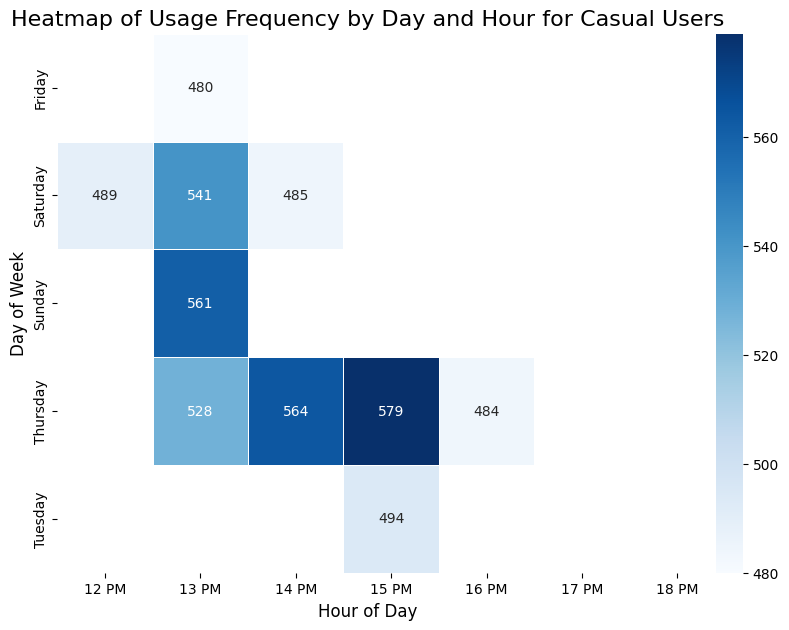

In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 실제 데이터 사용
data = {
    'day_of_week': ['Thursday', 'Thursday', 'Sunday', 'Saturday', 'Thursday', 'Tuesday', 'Saturday', 'Saturday', 'Thursday', 'Friday'],
    'hour_of_day': [17, 16, 15, 15, 15, 17, 12, 16, 18, 15],
    '이용횟수': [579, 564, 561, 541, 528, 494, 489, 485, 484, 480]
}
df = pd.DataFrame(data)

# 요일과 시간대별로 피벗 테이블 생성
pivot_table = df.pivot("day_of_week", "hour_of_day", "이용횟수")

plt.figure(figsize=(10, 7))
sns.heatmap(pivot_table, annot=True, fmt=".0f", linewidths=.5, cmap="Blues")

plt.title('Heatmap of Usage Frequency by Day and Hour for Casual Users', fontsize=16)
plt.ylabel('Day of Week', fontsize=12)

# x축 레이블을 'PM'으로 변경
hour_labels_pm = [f'{hour} PM' for hour in range(12, 19)]
plt.xticks(np.arange(0.5, len(hour_labels_pm) + 0.5), hour_labels_pm)

plt.xlabel('Hour of Day', fontsize=12)

plt.show()
